In [1]:
# Week 1 AAI 510
#libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
#import data
df = pd.read_csv('./creditDefault/application_train.csv')
bureauDf = pd.read_csv('./creditDefault/bureau.csv')
# Define a label encoder to help us with the categorical data
LabelEncoder = LabelEncoder()

In [3]:
print(df['NAME_FAMILY_STATUS'].value_counts())
df['NAME_FAMILY_STATUS'] = LabelEncoder.fit_transform(df['NAME_FAMILY_STATUS'])
print(df['NAME_FAMILY_STATUS'].value_counts())

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64
1    196432
3     45444
0     29775
2     19770
5     16088
4         2
Name: NAME_FAMILY_STATUS, dtype: int64


In [4]:
bureauDf['AMT_CREDIT_SUM_DEBT'].fillna(0,inplace=True)
bureauDf['AMT_CREDIT_SUM_LIMIT'].fillna(0,inplace=True)

### Variable 1: 'TARGET'
- Shows the number of people who are making late payments or no payments on their loans
- The reason you need this is because this is the point we are testing for in some cases
- 1 is people who are late. 0 is people who are in good standing
- Listed as TARGET in application_train|test

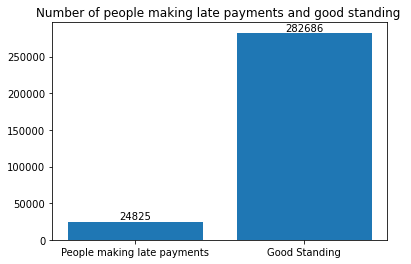

In [5]:
#Seperates targets into 1 and 0. 0 is good standing, 1 is bad standing
target1= df['TARGET']==1
target0= df['TARGET']==0
#plots the distribution of the target variable
plt.bar(['People making late payments','Good Standing'],[target1.sum(),target0.sum()])
plt.text(0, target1.sum(), '%d' % target1.sum(), ha='center', va='bottom')
plt.text(1, target0.sum(), '%d' % target0.sum(), ha='center', va='bottom')
plt.title('Number of people making late payments and good standing ')
plt.show()

### Variable 2: 'AMT_INCOME_TOTAL'
- The total amount of income the person with the loan makes
- We want this variable as it could be income dependent whether or not someone defaults on a loan
- Listed as AMT_INCOME_TOTAL in application_train|test

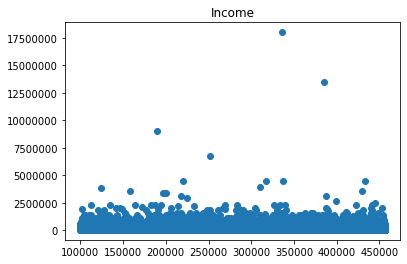

In [6]:
salary=df[df['AMT_INCOME_TOTAL'] < 100_000_000]
plt.scatter(salary['SK_ID_CURR'],salary['AMT_INCOME_TOTAL'])
plt.title('Income')
plt.ticklabel_format(style='plain')
plt.show()

### Variable 3: 'AMT_CREDIT'
- The total amount borrowed 
- I beleive that this is one of the most important vales next to salary on who will default. its possible that someone with a huge income also has a huge loan
- Listed as AMT_CREDIT in application_train|test

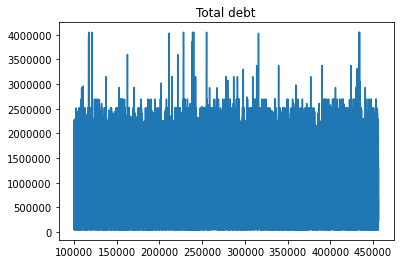

In [7]:
temp = df.sort_values(by=['AMT_CREDIT']).groupby('SK_ID_CURR').first()
plt.plot(temp['AMT_CREDIT'])
plt.title('Total debt')
plt.ticklabel_format(style='plain')
plt.show()

### Variable 4 & 5: CNT_CHILDREN and NAME_FAMILY_STATUS
- These 2 variables are the number of childeren the borrower has as well as the current marrige status
- The reason I chose these are to see if that married people are more responsible to pay their debt
- Also to see if the amount of children makes it harder or more likely to pay off debt
- Listed as CNT_CHILDREN and NAME_FAMILY_STATUS in application_train|test

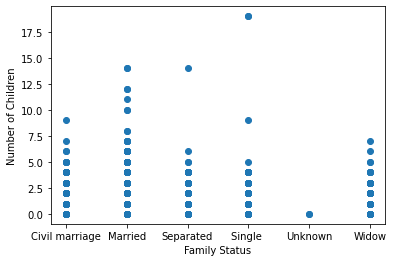

In [8]:
plt.scatter(df['NAME_FAMILY_STATUS'],df['CNT_CHILDREN'])
plt.xlabel('Family Status')
xticks = ['Civil marriage', 'Married', 'Separated', 'Single ', 'Unknown', 'Widow']
plt.xticks(range(len(xticks)), xticks)
plt.ylabel('Number of Children')
plt.show()

### Variable 6 & 7: DAYS_BIRTH and DAYS_EMPLOYED
 - These 2 variables are to determine the amount of days someone has been alive as well as how long they have had a job
 - Are younger people more likely to default on their loans? Old people?
 - Does the length of employment actually matter? or does it all depend on salary?
 - Listed as DAYS_BIRTH and DAYS_EMPLOYED in application_train|test

In [9]:
for x in range(len(df.DAYS_BIRTH)):

    df.DAYS_BIRTH[x] = ((df.DAYS_BIRTH[x] * -1)/365)
    if(df.DAYS_EMPLOYED[x] >= 0):
        df.DAYS_EMPLOYED[x] = 0
    else:
        df.DAYS_EMPLOYED[x] = ((df.DAYS_EMPLOYED[x] * -1)/365)

<ipython-input-9-f1408b9713e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DAYS_BIRTH[x] = ((df.DAYS_BIRTH[x] * -1)/365)
<ipython-input-9-f1408b9713e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DAYS_EMPLOYED[x] = ((df.DAYS_EMPLOYED[x] * -1)/365)


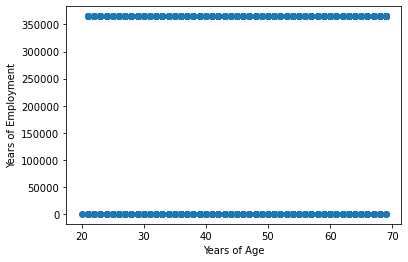

In [10]:
plt.scatter(df['DAYS_BIRTH'],df['DAYS_EMPLOYED'])
plt.xlabel('Years of Age')
plt.ylabel('Years of Employment')
plt.show()

### Variable 8: NAME_EDUCATION_TYPE
- This varibale shows the highest level of education that the borrower recieved
- Do people who drop out of highschool tend to fault on their loans more? Do people with higher education tend to pay on time?
- Listed as NAME_EDUCATION_TYPE in application_train|test

['Secondary', 'Higher', 'Incomplete', 'Lower', 'Academic']


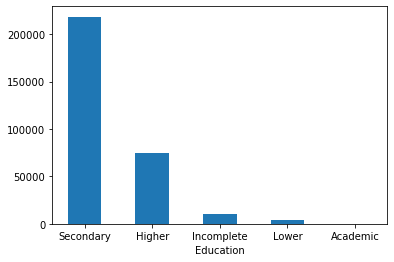

In [15]:
names = []
for name in df['NAME_EDUCATION_TYPE'].unique():
    names.append(name.split()[0])
print(names)
df['NAME_FAMILY_STATUS'] = LabelEncoder.fit_transform(df['NAME_FAMILY_STATUS'])
plt.bar(names,df['NAME_EDUCATION_TYPE'].value_counts(), width=0.5)
plt.xlabel('Education')
plt.show()

### Variable 9 and 10: AMT_CREDIT_SUM_DEBT and AMT_CREDIT_SUM_LIMIT
- Lastly, a variable that would be a good tell tale sign is the percentage of credit that the borrower is using
- Banks already use this to determin your credit limit as well as determining your APR. It probably has a lot to do with the risk of defaulting or missing payments.
- Listed as AMT_CREDIT_SUM_DEBT and AMT_CREDIT_SUM_LIMIT in Bureau.csv


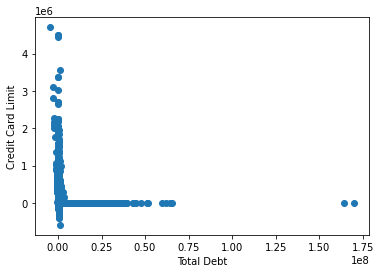

In [16]:
plt.scatter(bureauDf['AMT_CREDIT_SUM_DEBT'],bureauDf['AMT_CREDIT_SUM_LIMIT'])
plt.xlabel('Total Debt')
plt.ylabel('Credit Card Limit')
plt.show()